In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ROOT as rt
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F

Welcome to JupyROOT 6.22/09


In [2]:
f = TFile("selectedEventsTrueRecoBoth_091524.root","READ")
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

10913


In [3]:
h_trueAndReco = []
h_true = []
h_reco = []

for e in range(entries):

    t.GetEntry(e)
    
    if (t.passedSel_ == 1) or (t.passedSel_ == 3): # passes truth selection
        h_true.append(t.truthSel_truthMuonMom_)
    if (t.passedSel_ == 3): # passes both selections
        h_trueAndReco.append(t.truthSel_truthMuonMom_)
    if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection
        h_reco.append(t.truthSel_truthMuonMom_)
            
#print("h_true: ", h_true)
print("len(h_true): ", len(h_true))

#print("h_trueAndReco: ", h_trueAndReco)
print("len(h_trueAndReco): ", len(h_trueAndReco))

print("len(h_reco): ", len(h_reco))

true_arr = np.asarray(h_true)
trueAndReco_arr = np.asarray(h_trueAndReco)
reco_arr = np.asarray(h_reco)


len(h_true):  9964
len(h_trueAndReco):  1816
len(h_reco):  2765


maxTruth:  1.4995109671220415
true hist:  [1299 2873 2378 1570  969  560  235   80    0    0]
total true hist:  9964
bins1:  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
both hist:  [108 488 481 348 211 118  41  21   0   0]
total both hist:  1816
bins2:  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
hist_ratio:  [0.08314088 0.16985729 0.20227082 0.22165605 0.21775026 0.21071429
 0.17446809 0.2625            nan        nan]
hist_ratio: [0.08314088 0.16985729 0.20227082 0.22165605 0.21775026 0.21071429
 0.17446809 0.2625     0.         0.        ]
sum hist ratio:  1.5423576652130153


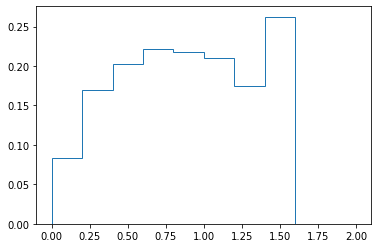

In [4]:
numberBins = 10
maxTruth = np.max(true_arr)
print("maxTruth: ", maxTruth)

np.seterr(divide='ignore', invalid='ignore')
binEdgeRange = (0, 2)

# Create histograms
hist1, bins1 = np.histogram(true_arr, bins=numberBins, range=binEdgeRange)
hist2, bins2 = np.histogram(trueAndReco_arr, bins=numberBins, range=binEdgeRange)

if len(hist1) != len(hist2):
    raise ValueError("Histograms must have the same number of bins")
    
print("true hist: ", hist1)
print("total true hist: ", np.sum(hist1) )
print("bins1: ", bins1)
print("both hist: ", hist2)
print("total both hist: ", np.sum(hist2) )
print("bins2: ", bins2)

    
# Divide histograms
hist_ratio = hist2 / hist1

print("hist_ratio: ", hist_ratio)

# Handle division by zero
hist_ratio = np.nan_to_num(hist_ratio)  # Replace NaN with 0 or another value

print("hist_ratio:", hist_ratio)
print("sum hist ratio: ", np.sum(hist_ratio) )

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)
plt.stairs(hist_ratio, bins1, label="1.3e21 POT (data, all runs)")

maxTruth:  1.4980952427457646
reco hist:  [ 0  0  0  0  3 10 23 16 30 26 37 49 33 50 43 54 58 39 53 72 52 41 47 57
 65 41 43 55 37 43 30 38 42 34 37 40 38 31 34 24 28 26 27 19 21 18 13 25
 19 15 12 19 11 12 16 11  9  9  9 10  8  4  6  5  3  2  3  2  3  5  7  1
  5  3  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
total reco hist:  1816
bins1:  [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]
both hist:  [ 0  0  0  0  3 10 23 16 30 26 37 49 33 50 43 54 58 39 53 72 52 41 47 57
 65 41 43 55 37 43 30 3

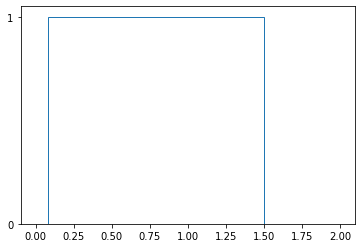

In [5]:
numberBins = 100
maxReco = np.max(reco_arr)
print("maxTruth: ", maxReco)

np.seterr(divide='ignore', invalid='ignore')
binEdgeRange = (0, 2)

# Create histograms
hist1, bins1 = np.histogram(reco_arr, bins=numberBins, range=binEdgeRange)
hist2, bins2 = np.histogram(trueAndReco_arr, bins=numberBins, range=binEdgeRange)

if len(hist1) != len(hist2):
    raise ValueError("Histograms must have the same number of bins")
    
print("reco hist: ", hist1)
print("total reco hist: ", np.sum(hist1) )
print("bins1: ", bins1)
print("both hist: ", hist2)
print("total both hist: ", np.sum(hist2) )
print("bins2: ", bins2)

    
# Divide histograms
hist_ratio = hist2 / hist1

print("hist_ratio: ", hist_ratio)

# Handle division by zero
hist_ratio = np.nan_to_num(hist_ratio)  # Replace NaN with 0 or another value

print("hist_ratio:", hist_ratio)
print("sum hist ratio: ", np.sum(hist_ratio) )

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)
plt.stairs(hist_ratio, bins1, label="1.3e21 POT (data, all runs)")

In [6]:
c1 = TCanvas("c1","c1",720,152,682,505)
c1.cd()
h_true.Draw("")

c1.Draw()

AttributeError: 'list' object has no attribute 'Draw'

In [ ]:
targetPOT = 1.3e21
simPOT = 4.68e20 # this is for run 1

h_trueAndReco.Scale(targetPOT/simPOT)
h_true.Scale(targetPOT/simPOT)

In [ ]:
h_eff = h_trueAndReco.Clone("h_eff")
h_eff.Divide(h_true)

h_eff.GetXaxis().SetTitle("Truth Muon Momentum [GeV]")

canvas = TCanvas("canvas","canvas",720,152,682,505)
canvas.cd()
h_eff.Draw("")

canvas.Draw()

#outfile = rt.TFile("plots.root","RECREATE")
#canvas.Write()

